In [1]:
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error

In [2]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests

#### Start and End Date for Matplotlib

In [3]:
start_date = "2016-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

# UK Natural Gas Imports

In [4]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=NG.NW2_EPG0_SWO_R35_BCF.W"
Series_Name= "Weekly Pacific Region Natural Gas Working Underground Storage, Weekly"
Series_ID= "NG.NW2_EPG0_SWO_R35_BCF.W"
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
# end_date= datetime.datetime.now()
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'Weekly Pacific Region Natural Gas Working Underground Storage, Weekly (Billion Cubic Feet)':'South Central Storage'}, inplace=True)
df
df.rename(columns={'index':'Date'}, inplace=True)
UKGasImports=df[['Date','South Central Storage']]
# UKGasImports['Date']=pd.to_datetime(UKGasImports['Date'], errors='coerce')

In [5]:
UKGasImports

,Date,South Central Storage
0,2010 0101 01,268
1,2010 0108 08,257
2,2010 0115 15,246
3,2010 0122 22,235
4,2010 0129 29,221
...,...,...
564,2020 1023 23,323
565,2020 1030 30,320
566,2020 1106 06,322
567,2020 1113 13,319


In [6]:
UKGasImports.Date = [ x[:-2] for x in UKGasImports.Date ]
UKGasImports

,Date,South Central Storage
0,2010 0101,268
1,2010 0108,257
2,2010 0115,246
3,2010 0122,235
4,2010 0129,221
...,...,...
564,2020 1023,323
565,2020 1030,320
566,2020 1106,322
567,2020 1113,319


In [7]:
UKGasImports.Date.dtype
# UKGasImports.Date=pd.to_datetime(UKGasImports['Date'].astype(int), format='%Y%m%d')

dtype('O')

In [8]:
def format_date(row_value):
    #split string on space and slice out the first two parts
    year=row_value.split(" ")[0]
    month=row_value.split(" ")[1][:2]
    day = row_value.split(" ")[1][2:]
    return f"{year}{month}{day}"
UKGasImports.Date=UKGasImports.Date.map(format_date)
UKGasImports.Date=pd.to_datetime(UKGasImports.Date.astype(int), format='%Y%m%d')

In [27]:
UKGasImports.Date

0     2010-01-01
1     2010-01-08
2     2010-01-15
3     2010-01-22
4     2010-01-29
         ...    
564   2020-10-23
565   2020-10-30
566   2020-11-06
567   2020-11-13
568   2020-11-20
Name: Date, Length: 569, dtype: datetime64[ns]

# Turkish Gas Imports

In [9]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "Liquefied U.S. Natural Gas Exports by Vessel to Turkey, Monthly"
Series_ID= "NG.NGM_EPG0_EVE_NUS-NTU_MMCF.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'Liquefied U.S. Natural Gas Exports by Vessel to Turkey, Monthly (Million Cubic Feet)':'Turkish Gas Imports'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
TurkishGasImports=df[['Date','Turkish Gas Imports']]
TurkishGasImports['Date']=pd.to_datetime(TurkishGasImports['Date'], errors='coerce')

In [10]:
TurkishGasImports

,Date,Turkish Gas Imports
0,2016-01-01,0
1,2016-02-01,0
2,2016-03-01,0
3,2016-04-01,0
4,2016-05-01,0
5,2016-06-01,0
6,2016-07-01,0
7,2016-08-01,0
8,2016-09-01,2941
9,2016-10-01,0


# Spanish Gas Imports

In [11]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "U.S. Liquefied Natural Gas Exports by Vessel to Spain, Monthly"
Series_ID= "NG.NGM_EPG0_EVE_NUS-NSP_MMCF.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'U.S. Liquefied Natural Gas Exports by Vessel to Spain, Monthly (Million Cubic Feet)':'Spanish Gas Imports'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
SpanishGasImports=df[['Date','Spanish Gas Imports']]
SpanishGasImports['Date']=pd.to_datetime(SpanishGasImports['Date'], errors='coerce')

In [12]:
SpanishGasImports

,Date,Spanish Gas Imports
0,2016-01-01,0
1,2016-02-01,0
2,2016-03-01,0
3,2016-04-01,0
4,2016-05-01,0
5,2016-06-01,0
6,2016-07-01,2930
7,2016-08-01,0
8,2016-09-01,0
9,2016-10-01,0


# South Korea Gas Imports

In [13]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "Liquefied U.S. Natural Gas Exports by Vessels to South Korea, Monthly"
Series_ID= "NG.NGM_EPG0_EVE_NUS-NKS_MMCF.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'Liquefied U.S. Natural Gas Exports by Vessels to South Korea, Monthly (Million Cubic Feet)':'Korean Gas Imports'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
KoreanGasImports=df[['Date','Korean Gas Imports']]
KoreanGasImports['Date']=pd.to_datetime(KoreanGasImports['Date'], errors='coerce')

In [14]:
KoreanGasImports

,Date,Korean Gas Imports
0,2016-01-01,0
1,2016-02-01,0
2,2016-03-01,0
3,2016-04-01,0
4,2016-05-01,0
5,2016-06-01,0
6,2016-07-01,0
7,2016-08-01,0
8,2016-09-01,0
9,2016-10-01,0


# Japanese Gas Imports

In [15]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "Liquefied U.S. Natural Gas Exports by Vessel to Japan, Monthly"
Series_ID= "NG.NGM_EPG0_EVE_NUS-NJA_MMCF.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'Liquefied U.S. Natural Gas Exports by Vessel to Japan, Monthly (Million Cubic Feet)':'Japanese Gas Imports'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
JapaneseGasImports=df[['Date','Japanese Gas Imports']]
JapaneseGasImports['Date']=pd.to_datetime(JapaneseGasImports['Date'], errors='coerce')

In [16]:
JapaneseGasImports

,Date,Japanese Gas Imports
0,1973-01-01,4375
1,1973-02-01,4421
2,1973-03-01,1463
3,1973-04-01,5854
4,1973-05-01,5884
...,...,...
560,2020-04-01,18387
561,2020-05-01,13729
562,2020-06-01,21836
563,2020-07-01,10618


# Chinese Gas Imports

In [17]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "U.S. Liquefied Natural Gas Exports by Vessel to China, Monthly"
Series_ID= "NG.NGM_EPG0_EVE_NUS-NCH_MMCF.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'U.S. Liquefied Natural Gas Exports by Vessel to China, Monthly (Million Cubic Feet)':'Chinese Gas Imports'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
ChineseGasImports=df[['Date','Chinese Gas Imports']]
ChineseGasImports['Date']=pd.to_datetime(ChineseGasImports['Date'], errors='coerce')

In [18]:
ChineseGasImports

,Date,Chinese Gas Imports
0,2011-01-01,0
1,2011-02-01,0
2,2011-03-01,0
3,2011-04-01,0
4,2011-05-01,1127
...,...,...
87,2020-04-01,21140
88,2020-05-01,14535
89,2020-06-01,0
90,2020-07-01,10358


# Italian Gas Imports

In [19]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "Liquefied U.S. Natural Gas Exports by Vessel to Italy, Monthly"
Series_ID= "NG.NGM_EPG0_EVE_NUS-NIT_MMCF.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'Liquefied U.S. Natural Gas Exports by Vessel to Italy, Monthly (Million Cubic Feet)':'Italian Gas Imports'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
ItalianGasImports=df[['Date','Italian Gas Imports']]
ItalianGasImports['Date']=pd.to_datetime(ItalianGasImports['Date'], errors='coerce')

In [20]:
ItalianGasImports

,Date,Italian Gas Imports
0,2016-11-01,3328
1,2017-06-01,3120
2,2017-08-01,3372
3,2018-01-01,0
4,2018-02-01,0
5,2018-03-01,0
6,2018-04-01,0
7,2018-05-01,0
8,2018-06-01,0
9,2018-07-01,0


# French Gas Imports

In [21]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name= "U.S. Liquefied Natural Gas Exports by Vessel to France, Monthly"
Series_ID= "NG.NGM_EPG0_EVE_NUS-NFR_MMCF.M"
#install EIA package--- pip install EIA_python
#pip install pyOpenSSL to get around SSL error
#these are the API keys I set up
api_key = EIA_key
api = eia.API(api_key)
#import data but still need to clean it
series_search = api.data_by_series(series=Series_ID)
df = pd.DataFrame(series_search)
# define a series and pass through api and Series_ID
def retrieve_time_series(api, Series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID)
    ##Create a pandas dataframe from the retrieved time series
    global df
    df = pd.DataFrame(series_search)
    return df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    df=retrieve_time_series(api, Series_ID)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)
#Clean the dataframe by resetting the index because the date is automatically set as the index
df.reset_index(inplace=True)
df.rename(columns={'U.S. Liquefied Natural Gas Exports by Vessel to France, Monthly (Million Cubic Feet)':'French Gas Imports'}, inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
FrenchGasImports=df[['Date','French Gas Imports']]
FrenchGasImports['Date']=pd.to_datetime(FrenchGasImports['Date'], errors='coerce')

In [22]:
FrenchGasImports

,Date,French Gas Imports
0,2018-10-01,4846
1,2018-11-01,9991
2,2018-12-01,3453
3,2019-01-01,7303
4,2019-03-01,20853
5,2019-04-01,17092
6,2019-05-01,6621
7,2019-08-01,3249
8,2019-09-01,6740
9,2019-10-01,14228


In [23]:
UKGasImports_date=        UKGasImports[(UKGasImports['Date']>start_date)& (UKGasImports['Date']< end_date)]
TurkishGasImports_date=   TurkishGasImports[(TurkishGasImports['Date']>start_date)& (TurkishGasImports['Date']< end_date)]
SpanishGasImports_date=   SpanishGasImports[(SpanishGasImports['Date']>start_date)& (SpanishGasImports['Date']< end_date)]
KoreanGasImports_date=    KoreanGasImports[(KoreanGasImports['Date']>start_date)& (KoreanGasImports['Date']< end_date)]
JapaneseGasImports_date=  JapaneseGasImports[(JapaneseGasImports['Date']>start_date)& (JapaneseGasImports['Date']< end_date)]

# JapaneseGasImports_date=  JapaneseGasImports[(JapaneseGasImports['Date']>start_date)& (JapaneseGasImports['Date']< end_date)]
ChineseGasImports_date=   ChineseGasImports[(ChineseGasImports['Date']>start_date)& (ChineseGasImports['Date']< end_date)]
ItalianGasImports_date=   ItalianGasImports[(ItalianGasImports['Date']>start_date)& (ItalianGasImports['Date']< end_date)]
FrenchGasImports_date=    FrenchGasImports[(FrenchGasImports['Date']>start_date)& (FrenchGasImports['Date']< end_date)]


# Visualizations for the Graphs

## Chinese Gas Imports from the US

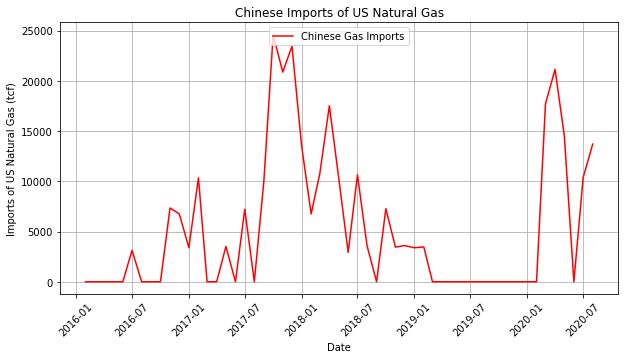

In [24]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=True, figsize=(10,5))
ax1.set_xlabel('Date')
ax1.set_ylabel('Imports of US Natural Gas (tcf)')
ax1.plot(ChineseGasImports_date['Date'], ChineseGasImports_date['Chinese Gas Imports'], color='red')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Chinese Imports of US Natural Gas")
ax1.grid()
red_line = mlines.Line2D([], [], color='red', label='Chinese Gas Imports')
plt.legend(handles=[red_line], loc='upper center')
plt.savefig("Imports_By_Country_Images/Chinese_Gas_Imports.png", bbox_inches='tight')

## Japanese Gas Imports from the US

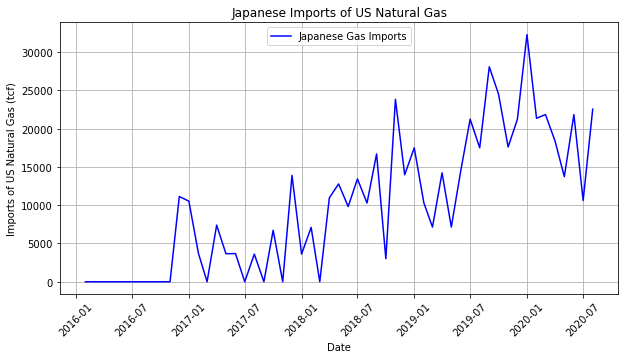

In [25]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=False, figsize=(10,5))
ax1.set_xlabel('Date')
ax1.set_ylabel('Imports of US Natural Gas (tcf)')
ax1.plot(JapaneseGasImports_date['Date'], JapaneseGasImports_date['Japanese Gas Imports'], color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax1.tick_params(axis='y')
ax1.set_title("Japanese Imports of US Natural Gas")
ax1.grid()
red_line = mlines.Line2D([], [], color='blue', label='Japanese Gas Imports')
plt.legend(handles=[red_line], loc='upper center')
plt.savefig("Imports_By_Country_Images/Jap_Gas_Imports.png", bbox_inches='tight')

## Korean/Chinese/Japanese Gas Imports from the US

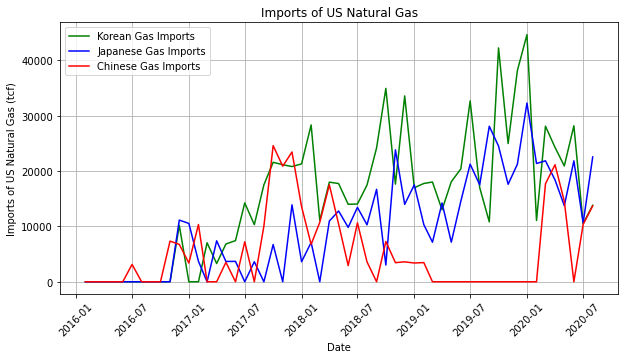

In [26]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax=plt.subplots(frameon=False, figsize=(10,5))
ax.set_xlabel('Date')
ax.set_ylabel('Imports of US Natural Gas (tcf)')
ax.plot(KoreanGasImports_date['Date'], KoreanGasImports_date['Korean Gas Imports'], color='green')
ax.plot(JapaneseGasImports_date['Date'], JapaneseGasImports_date['Japanese Gas Imports'], color='blue')
ax.plot(ChineseGasImports_date['Date'], ChineseGasImports_date['Chinese Gas Imports'], color='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax1.tick_params(axis='y')
ax.set_title("Imports of US Natural Gas")
ax.grid()

green_line = mlines.Line2D([], [], color='green', label='Korean Gas Imports')
blue_line = mlines.Line2D([], [], color='blue', label='Japanese Gas Imports')
red_line = mlines.Line2D([], [], color='red', label='Chinese Gas Imports')

plt.legend(handles=[green_line, blue_line, red_line], loc='upper left')
plt.savefig("Imports_By_Country_Images/Korean_Gas_Imports.png", bbox_inches='tight')